In [46]:
import requests
import numpy as np
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
shoesURL = "https://us.puma.com/en/us/men/shoes"

iHeader={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36'
}

page = requests.get(shoesURL, headers=iHeader)


In [82]:
soup= BeautifulSoup(page.content,"html.parser")


In [5]:
products = soup.find_all("div", class_="product-tile-info-container")
print(products)

[<div class="product-tile-info-container" data-price-target="">
<div class="product-tile-info-text">
<a class="product-tile-title product-tile__title pdp-link line-item-limited" href="/en/us/pd/suede-classic-xxi-mens-sneakers/374915.html?dwvar_374915_color=13">Suede Classic XXI Men's Sneakers</a>
</div>
<div class="product-tile-info-price product-tile__price">
<div class="product-tile-price-standard product-tile__price--standard">$70.00</div>
</div>
</div>, <div class="product-tile-info-container" data-price-target="">
<div class="product-tile-info-text">
<a class="product-tile-title product-tile__title pdp-link line-item-limited" href="/en/us/pd/suede-classic-xxi-mens-sneakers/374915.html?dwvar_374915_color=15">Suede Classic XXI Men's Sneakers</a>
</div>
<div class="product-tile-info-price product-tile__price">
<div class="product-tile-price-standard product-tile__price--standard">$70.00</div>
</div>
</div>, <div class="product-tile-info-container" data-price-target="">
<div class="pr

In [6]:
name=soup.find('a',class_="product-tile-title product-tile__title pdp-link line-item-limited").text

price=soup.find('div',class_="product-tile-price-standard product-tile__price--standard").text

shoes={
    'name':name,
    'price':price
}

print(shoes)

{'name': "Suede Classic XXI Men's Sneakers", 'price': '$70.00'}


In [7]:
shoes_dataset = soup.findAll("div",{"class":"product-tile-info-container"})

In [49]:
prices = []

for shoe in shoes_dataset:
    a = shoe.findAll('a',{"class":"product-tile-title product-tile__title pdp-link line-item-limited"})
    Shoes = a[0].text
    print("Shoe Name:" + Shoes)
    
    c = shoe.findAll('div',{"class":"product-tile-price-standard product-tile__price--standard"})
    Price = c[0].text.replace('$', '')
    if(float(Price) > 0):
        prices.append(Shoes + ',' + Price) 
    print("Price:" + '$' + Price)

Shoe Name:Suede Classic XXI Men's Sneakers
Price:$70.00
Shoe Name:Suede Classic XXI Men's Sneakers
Price:$70.00
Shoe Name:Suede Classic XXI Men's Sneakers
Price:$70.00
Shoe Name:Suede Classic XXI Men's Sneakers
Price:$70.00
Shoe Name:Suede Classic XXI Men's Sneakers
Price:$70.00
Shoe Name:Suede Classic XXI Men's Sneakers
Price:$70.00
Shoe Name:Suede Classic XXI Men's Sneakers
Price:$70.00
Shoe Name:Suede Classic XXI Men's Sneakers
Price:$70.00
Shoe Name:Suede Classic XXI Men's Sneakers
Price:$70.00
Shoe Name:Suede Classic XXI Men's Sneakers
Price:$70.00
Shoe Name:Suede Classic XXI Men's Sneakers
Price:$70.00
Shoe Name:Suede Classic XXI Men's Sneakers
Price:$70.00
Shoe Name:Suede Classic XXI Men's Sneakers
Price:$70.00
Shoe Name:PUMA x HARIBO RS-X³ Sneakers
Price:$120.00
Shoe Name:PUMA x HARIBO Men's Suede Sneakers
Price:$80.00
Shoe Name:RS-DREAMER Basketball Shoes
Price:$125.00
Shoe Name:RS-DREAMER Basketball Shoes
Price:$125.00
Shoe Name:RS-DREAMER Basketball Shoes
Price:$125.00
Shoe 

In [78]:
print('Total Shoes: ' + str(len(prices)) + '\n')

mybudget = 90 #Anything above $90

print('Shoes above your filter:')
for p in prices:
  ShoePrice = float(p.split(',')[1])
  if (ShoePrice >= mybudget):
     print(str(p))

Total Shoes: 33

Shoes above your filter:
PUMA x HARIBO RS-X³ Sneakers,120.00
RS-DREAMER Basketball Shoes,125.00
RS-DREAMER Basketball Shoes,125.00
RS-DREAMER Basketball Shoes,125.00
RS-DREAMER Basketball Shoes,125.00
RS-X Airbrush,110.00
Calibrate Runner Luxe Men's Shoes,140.00
Ferrari IONF Men's Motorsport Shoes,630.00
Speedcat OG+ Sparco Men's Motorsport Shoes,100.00
Mirage Tech Metallic Sneakers,90.00
BMW M Motorsport Speedcat Motorsport Sneakers,100.00
ULTRA 1.3 FG/AG Soccer Cleats,200.00


In [75]:
df = pd.DataFrame([rec.split(',') for rec in prices])
df.columns = ['ShoeName', 'Price']
df["Price"] = pd.to_numeric(df["Price"], downcast='float')
df.drop_duplicates(subset=['ShoeName', 'Price'], inplace=True)

print(df.shape)
print(df)

(16, 2)
                                         ShoeName  Price
0                Suede Classic XXI Men's Sneakers   70.0
13                   PUMA x HARIBO RS-X³ Sneakers  120.0
14             PUMA x HARIBO Men's Suede Sneakers   80.0
15                    RS-DREAMER Basketball Shoes  125.0
20                                  RS-X Airbrush  110.0
21       PUMA x WHITE CASTLE Men's Suede Sneakers   80.0
22              Calibrate Runner Luxe Men's Shoes  140.0
23            Ferrari IONF Men's Motorsport Shoes  630.0
24     Speedcat OG+ Sparco Men's Motorsport Shoes  100.0
25                            Roma Italy Sneakers   70.0
26                   Suede Mid XXI Men's Sneakers   80.0
28                           Roma Basic+ Sneakers   60.0
29                  Basket Mid XXI Men's Sneakers   80.0
30                  Mirage Tech Metallic Sneakers   90.0
31  BMW M Motorsport Speedcat Motorsport Sneakers  100.0
32                  ULTRA 1.3 FG/AG Soccer Cleats  200.0


<AxesSubplot:xlabel='ShoeName'>

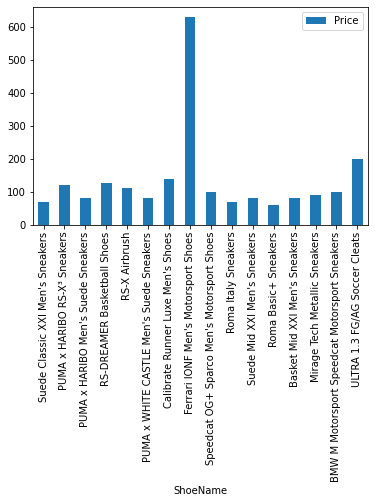

In [76]:
df.plot.bar(x='ShoeName', y='Price')

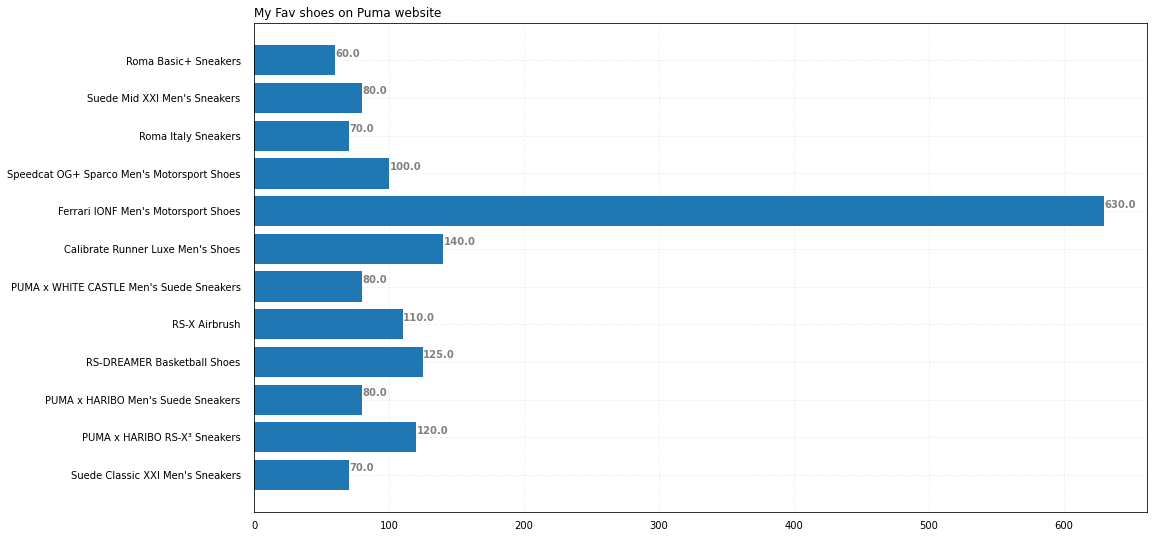

In [81]:
sName = df['ShoeName'].head(12)
sPrice = df['Price'].head(12)

fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(sName, sPrice)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
ax.set_title('My Fav shoes on Puma website',
             loc ='left', )

plt.show()